In [2]:
import numpy as np
import pandas as pd

df_merge = pd.read_csv('merged_df.csv')

## Close + Label

Epoch 1/30
18/18 [==============================] - 1s 8ms/step - loss: 0.2522 - val_loss: 0.0060
Epoch 2/30
18/18 [==============================] - 0s 3ms/step - loss: 0.0821 - val_loss: 0.1628
Epoch 3/30
18/18 [==============================] - 0s 2ms/step - loss: 0.0396 - val_loss: 0.0488
Epoch 4/30
18/18 [==============================] - 0s 3ms/step - loss: 0.0195 - val_loss: 0.0264
Epoch 5/30
18/18 [==============================] - 0s 3ms/step - loss: 0.0110 - val_loss: 0.0044
Epoch 6/30
18/18 [==============================] - 0s 3ms/step - loss: 0.0100 - val_loss: 0.0047
Epoch 7/30
18/18 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.0034
Epoch 8/30
18/18 [==============================] - 0s 3ms/step - loss: 0.0081 - val_loss: 0.0026
Epoch 9/30
18/18 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 8.6562e-04
Epoch 10/30
18/18 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.0016
Epoch 11/30
18/

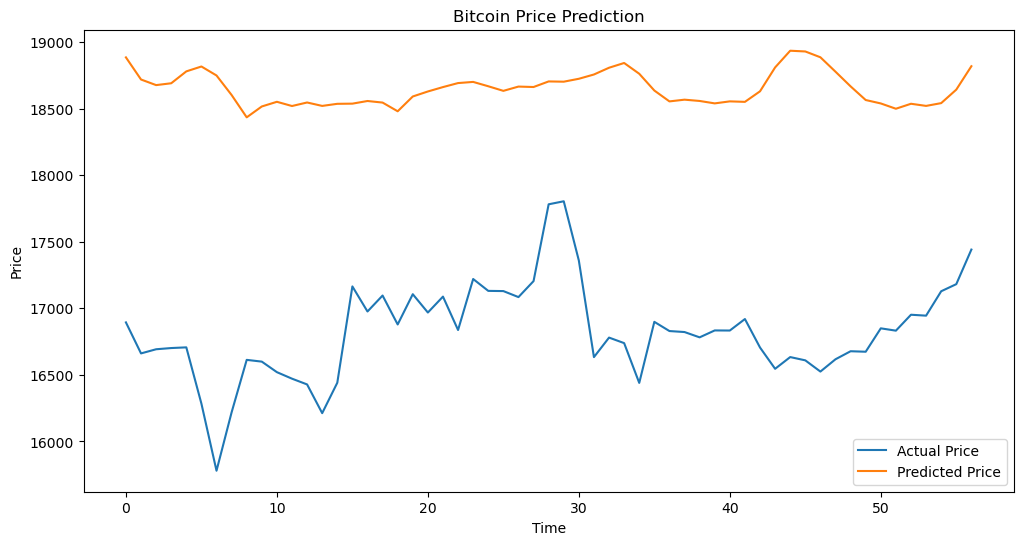

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


data = df_merge[['date', 'label', 'close']]

# 将日期转换为日期时间格式
data['date'] = pd.to_datetime(data['date'])

# 排序数据
data.sort_values('date', inplace=True)

# 规范化数据
scaler = MinMaxScaler()
data[['label', 'close']] = scaler.fit_transform(data[['label', 'close']])

# 确定测试数据集的起始日期（最后一个月的数据）
test_start_date = data['date'].max() - pd.DateOffset(months=2)

# 分割数据集
train_data = data[data['date'] < test_start_date]
test_data = data[data['date'] >= test_start_date]

# 准备数据窗口
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 5
X_train, y_train = create_dataset(train_data[['label', 'close']], train_data['close'], time_steps)
X_test, y_test = create_dataset(test_data[['label', 'close']], test_data['close'], time_steps)

# 构建LSTM模型
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# 训练模型
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, verbose=1)

# 使用模型进行预测
y_pred = model.predict(X_test)

# 反规范化预测
y_pred_inverse = scaler.inverse_transform(np.concatenate((np.zeros_like(y_pred), y_pred), axis=1))[:,1]
y_test_inverse = scaler.inverse_transform(np.concatenate((np.zeros_like(y_test.reshape(-1, 1)), y_test.reshape(-1, 1)), axis=1))[:,1]

# 绘制实际值和预测值
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='Actual Price')
plt.plot(y_pred_inverse, label='Predicted Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


## Close

/var/folders/zf/zcz9p_qn18934prx45xnw6dc0000gn/T/ipykernel_10402/234514380.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])
/var/folders/zf/zcz9p_qn18934prx45xnw6dc0000gn/T/ipykernel_10402/234514380.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values('date', inplace=True)
/var/folders/zf/zcz9p_qn18934prx45xnw6dc0000gn/T/ipykernel_10402/234514380.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


Epoch 1/30
18/18 [==============================] - 1s 8ms/step - loss: 0.2501 - val_loss: 0.0023
Epoch 2/30
18/18 [==============================] - 0s 3ms/step - loss: 0.0792 - val_loss: 0.0915
Epoch 3/30
18/18 [==============================] - 0s 2ms/step - loss: 0.0270 - val_loss: 0.0557
Epoch 4/30
18/18 [==============================] - 0s 3ms/step - loss: 0.0199 - val_loss: 0.0464
Epoch 5/30
18/18 [==============================] - 0s 3ms/step - loss: 0.0134 - val_loss: 0.0269
Epoch 6/30
18/18 [==============================] - 0s 3ms/step - loss: 0.0098 - val_loss: 0.0137
Epoch 7/30
18/18 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.0068
Epoch 8/30
18/18 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0038
Epoch 9/30
18/18 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.0032
Epoch 10/30
18/18 [==============================] - 0s 3ms/step - loss: 0.0076 - val_loss: 0.0012
Epoch 11/30
18/18 [

2/2 [==============================] - 0s 2ms/step


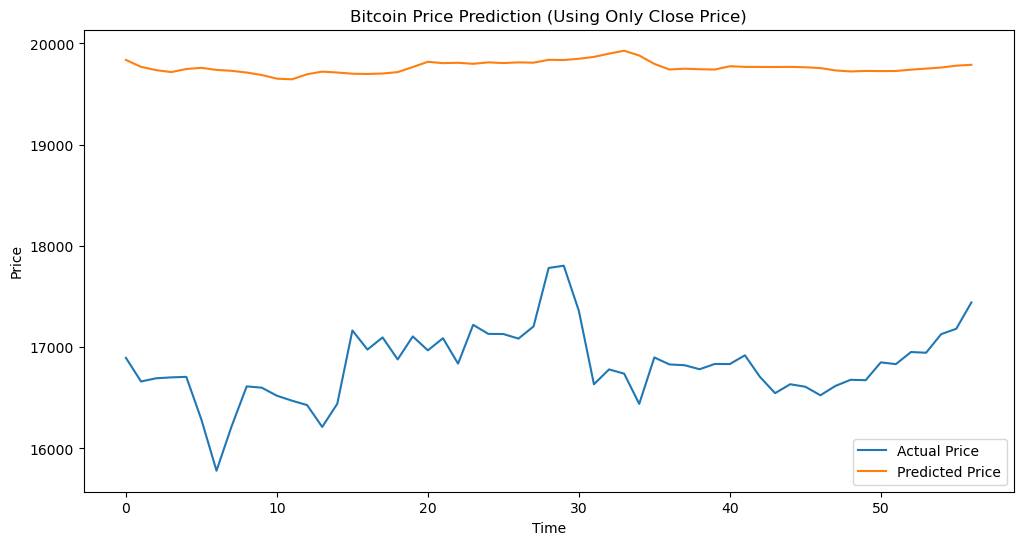

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# 载入数据
data = df_merge[['date', 'close']]

# 将日期转换为日期时间格式
data['date'] = pd.to_datetime(data['date'])

# 排序数据
data.sort_values('date', inplace=True)

# 规范化数据
scaler = MinMaxScaler()
data['close'] = scaler.fit_transform(data[['close']])

# 确定测试数据集的起始日期（最后一个月的数据）
test_start_date = data['date'].max() - pd.DateOffset(months=2)

# 分割数据集
train_data = data[data['date'] < test_start_date]
test_data = data[data['date'] >= test_start_date]

# 准备数据窗口
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 5
X_train, y_train = create_dataset(train_data['close'], train_data['close'], time_steps)
X_test, y_test = create_dataset(test_data['close'], test_data['close'], time_steps)

# 构建LSTM模型
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# 训练模型
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, verbose=1)

# 使用模型进行预测
y_pred = model.predict(X_test)

# 反规范化预测
y_pred_inverse = scaler.inverse_transform(y_pred)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

# 绘制实际值和预测值
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='Actual Price')
plt.plot(y_pred_inverse, label='Predicted Price')
plt.title('Bitcoin Price Prediction (Using Only Close Price)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
